<a href="https://colab.research.google.com/github/Gaurav7004/DeepLearning_PlantDiseases/blob/master/Outliers_Detection_Ten_May_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import os
import numpy as np
import pandas as pd
import math

In [ ]:

# This module takes path of any random dataset from the user

class User_Input():
  # Taking File Path as input from the user
  user_input = input("Enter the path of your file: ")

  try:
    
    # user_file = open(user_input,'r+')
    with open(user_input, "r+") as file:

      print(" found the file !")

      for fp in user_file:
          # Split the extension from the path and normalise it to lowercase.
          ext = os.path.splitext(fp)[-1].lower().suffix()

          # For handling breakdown in case of any errors
          try:
            # Now we can simply use .endswith to check for equality, no need for wildcards.
            # For handling csv files
            if ext.endswith('.csv'):
                df = pd.read_csv(user_input)

            # For handling excel files
            elif ext.endswith('.xlsx'):
                df = pd.read_excel(user_input)

            # For handling json files
            elif ext.endswith('.json'):
                df = pd.read_json(user_input)

            # For handing unknown files types
            else:
                print( fp,"is an unknown file format.")
                break

          # to handle the situation if try block gets failed
          except:
              pass

  except:
    # The assert keyword lets you test if a condition in your code returns True, if not, the program will raise an AssertionError.
    # print(os.path.exists(user_input), " did not find the file at, "+str(user_input))
    df = pd.read_excel('Students.xlsx')
    # pass



Enter the path of your file: k


In [76]:
# reading the required excel file for debugging purpose

df = pd.read_csv('Age_Weight.csv')

In [77]:
# handling missing values
def handling_missing_data():

  # Imputation
  # Handling columns which have null values

  # Select number columns.
  selectNum == df.select_dtypes('number')
  # Fill numeric columns with mean.
  df[selectNum.columns] = selectNum.fillna(selectNum.mean())

  # Select string and object columns.
  selectObj == df.select_dtypes('object')
  # Fill object columns with mode.
  df[selectObj.columns] = selectObj.fillna(selectObj.agg(lambda x: x.mode().values[0]))

df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [78]:
# automation of label encoding 
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

# df.apply(LabelEncoder().fit_transform)

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [79]:
df = MultiColumnLabelEncoder(df.columns).fit_transform(df)
df.head(50)

,Gender,Height,Weight,Index
0,1,34,46,4
1,1,49,37,2
2,0,45,60,4
3,0,55,54,3
4,1,9,11,3
5,1,49,54,3
6,1,7,42,5
7,1,14,61,5
8,1,34,40,3
9,0,29,53,4


,Gender,Height,Weight,Index
Gender,1.000000,-0.017677,0.009757,0.028786
Height,-0.017677,1.000000,0.000103,-0.422223
Weight,0.009757,0.000103,1.000000,0.805654
Index,0.028786,-0.422223,0.805654,1.000000


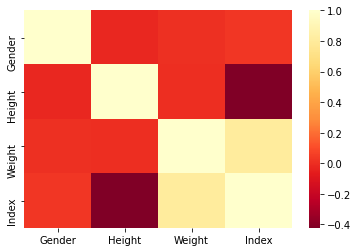

In [80]:
# Positive Correlation: both variables change in the same direction.
# Neutral Correlation: No relationship in the change of the variables.
# Negative Correlation: variables change in opposite directions.

# corelation between the columns
corr = df.corr()
import seaborn as sns
sns.heatmap(corr, xticklabels= corr.columns, yticklabels=corr.columns, cmap='YlOrRd_r')
corr

In [81]:
# Select the column(variable) in from the above list in which you want to detect outliers

list_of_cols = list(df.columns.values)
list_of_cols

['Gender', 'Height', 'Weight', 'Index']

In [82]:
import re

try:
  # Enter the name of the column(variable)
  target_column = input(str())

  # Now Match the target_column with column name of correlation matrix 
  new_list = corr[target_column]
  new_list = new_list.drop(labels = []) 
  print(new_list)
  

except:
  print("Enter the correct name of the column...!")



Height
Gender   -0.017677
Height    1.000000
Weight    0.000103
Index    -0.422223
Name: Height, dtype: float64


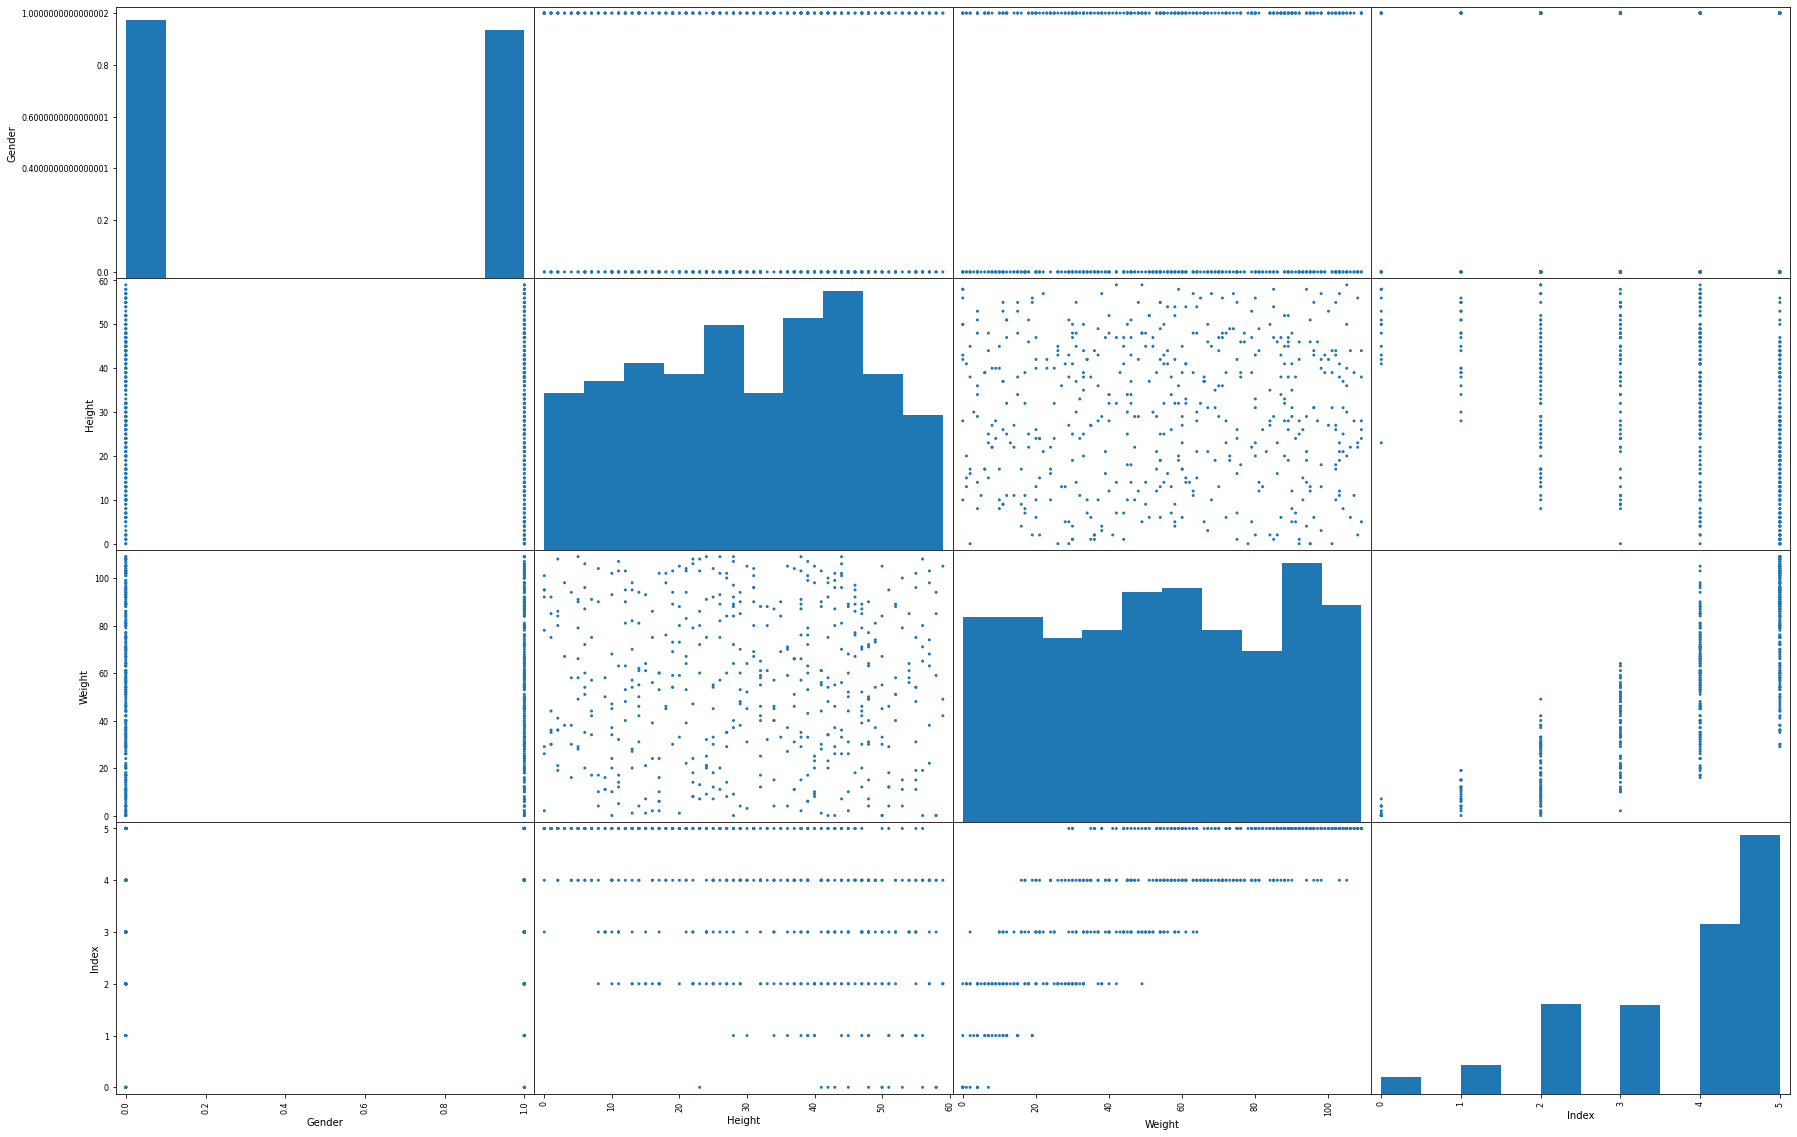

In [55]:
# corelation between two columns via scatter plot
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df, alpha=1, figsize= (30, 20))
plt.show()


In [84]:
# Spltting the dataset into train and test values.

from sklearn.model_selection import train_test_split

# I am selecting the y on the basis of my visualization
X, y = df.Height, df.Index

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Xval = X
yval = y


In [85]:
# For estimating values of mean and variance for further calculations

X = df.to_numpy()

def estimateGaussian(X):
    n = np.size(X, 1)
    m = np.size(X, 0)
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    
    mu = np.reshape(float(1/m)*np.sum(X, 0), (1, n))
    sigma2 = np.reshape((1/m)*np.sum(np.power((X - mu),2), 0),(1, n))
    
    return mu, sigma2

mu, sigma2 = estimateGaussian(X)

print('mean: ',mu, ' variance: ',sigma2)

mean:  [[ 0.49  29.944 55.572  3.748]]  variance:  [[2.49900000e-01 2.67612864e+02 1.01934482e+03 1.83249600e+00]]


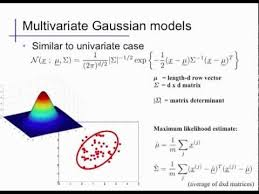

In [86]:
# The multivariate normal distribution is a multidimensional generalisation of the one-dimensional normal distribution . 
# It represents the distribution of a multivariate random variable that is made up of multiple random variables that can be correlated with eachother. 

# Applying mutlivariate gaussian distribution

def multivariateGaussian(X, mu, sigma2):
     n = np.size(sigma2, 1)
     m = np.size(sigma2, 0)
     #print(m,n)
     
     if n == 1 or m == 1:
        # print('Yes!')
         sigma2 = np.diag(sigma2[0, :])
     #print(sigma2)
     X = X - mu
     pi = math.pi
     det = np.linalg.det(sigma2)
     inv = np.linalg.inv(sigma2)
     val = np.reshape((-0.5)*np.sum(np.multiply((X@inv),X), 1),(np.size(X, 0), 1))
     #print(val.shape)
     p = np.power(2*pi, -n/2)*np.power(det, -0.5)*np.exp(val)
     
    # p is probability density of every new person (in rows)

     return p

In [87]:
pval = multivariateGaussian(X, mu, sigma2)

![alt text](https://miro.medium.com/max/317/1*UKPPze8OXLLrK8lkxvQrtg.png)


Precision = true positive/(true positive + false positive)

Recall = true positive /(true positive + false negative)

Best parameters are the ones in which the F1 score value is maximum.


In [88]:
# thresholding the probability numpy array

def selectThreshHold(yval, pval):
    
    F1 = 0

    # The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall).

    bestF1 = 0
    bestEpsilon = 0
    
    stepsize = (np.max(pval) - np.min(pval))/1000
        
    epsVec = np.arange(np.min(pval), np.max(pval), stepsize)
    
    noe = len(epsVec)
    
    for eps in range(noe):
        epsilon = epsVec[eps]
        pred = (pval < epsilon)
        prec, rec = 0,0
        tp,fp,fn = 0,0,0
        
        try:
            for i in range(np.size(pval,0)):
                if pred[i] == 1 and yval[i] == 1:
                    tp+=1
                elif pred[i] == 1 and yval[i] == 0:
                    fp+=1
                elif pred[i] == 0 and yval[i] == 1:
                    fn+=1

            # preciosion
            prec = tp/(tp + fp)

            # recall
            rec = tp/(tp + fn)

            # F1 score
            F1 = 2*prec*rec/(prec + rec)

            # Best F1
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon

        # handling Zero Division Error 
        except ZeroDivisionError:
            print('Warning dividing by zero!!')          
       
    return bestF1, bestEpsilon


In [89]:
F1, epsilon = selectThreshHold(yval, pval)
print('Epsilon and F1 are:', epsilon, F1)

Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Warning dividing by zero!!
Epsilon and F1 are: 1.6489595024666475e-06 0.7719298245614035


In [90]:
outl = (p < epsilon)

def findIndices(binVec):
    l = []
    for i in range(len(binVec)):
        if binVec[i] == 1:
            l.append(i)
    return l

listOfOutliers = findIndices(outl)

In [91]:
count_outliers = len(listOfOutliers)
print('\n Number of outliers:', count_outliers)
print('Outliers in ' + target_column + " " + ' are --> ')
print('\n',listOfOutliers)


 Number of outliers: 35
Outliers in Height  are --> 

 [27, 31, 32, 51, 60, 62, 79, 85, 98, 99, 150, 200, 214, 224, 242, 244, 269, 273, 279, 280, 308, 354, 358, 360, 372, 381, 410, 420, 424, 425, 438, 453, 462, 492, 493]


In [ ]:
#! pip install pyod    

In [ ]:
from __future__ import division
from __future__ import print_function

import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
                 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
                 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
                 LOF(n_neighbors=50)]

In [ ]:

# Define nine outlier detection tools to be compared
classifiers = {
    'Angle-based Outlier Detector (ABOD)':
        ABOD(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor (CBLOF)':
        CBLOF(contamination=outliers_fraction,
              check_estimator=False, random_state=random_state),
    'Feature Bagging':
        FeatureBagging(LOF(n_neighbors=35),
                       contamination=outliers_fraction,
                       random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(
        contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction,
                                random_state=random_state),
    'K Nearest Neighbors (KNN)': KNN(
        contamination=outliers_fraction),
    'Average KNN': KNN(method='mean',
                       contamination=outliers_fraction),
    'Local Outlier Factor (LOF)':
        LOF(n_neighbors=35, contamination=outliers_fraction),
    'Minimum Covariance Determinant (MCD)': MCD(
        contamination=outliers_fraction, random_state=random_state),
    'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': PCA(
        contamination=outliers_fraction, random_state=random_state),
    'Locally Selective Combination (LSCP)': LSCP(
        detector_list, contamination=outliers_fraction,
        random_state=random_state)
}